In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from IPython.display import display
from IPython.display import clear_output
from ipywidgets import widgets
import csv

In [4]:
os.getcwd()

'C:\\Users\\thken\\Desktop\\hackathons\\VolHacks4'

In [8]:
os.chdir("C:/Users/thken/Desktop/hackathons/VolHacks4/assets/")
df = pd.read_excel('sarcasmDataSet.xlsx', index_col=None, converters={'label':int, 'comment':str})

C:\Users\thken\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
df['label'].count()

1010827

In [10]:
traindf = df[:800000]

In [11]:
testdf = df[800000:]

In [12]:
traindf = traindf.dropna()
testdf = testdf.dropna()

In [13]:
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

text_clf = text_clf.fit(traindf['comment'], traindf['label'])

In [14]:
predicted = text_clf.predict(testdf['comment'])

In [15]:
np.mean(predicted == testdf['label'])

0.6770376134643581

In [16]:
joblib.dump(text_clf, 'multinomialNB.pkl')

['multinomialNB.pkl']

In [17]:
clf = joblib.load('multinomialNB.pkl')

In [19]:
def predict(phrase):
    pred = clf.predict([phrase])[0]
    if pred == 1:
        print("Uh oh, sarcasm detected!")
    elif pred == 0:
        print("Nah, it's serious")

In [20]:
def handle_submit(sender):
    predict(sender.value)
    button = widgets.Button(description="Again!")
    display(button)
    button.on_click(on_button_clicked)

def on_button_clicked(b):
    clear_output()
    start()
    
def start():
    clear_output()
    print('Is that sarcasm?')
    text = widgets.Text()
    display(text)
    text.on_submit(handle_submit)

<h1><center>R U Serious?</center></h1>

<div>
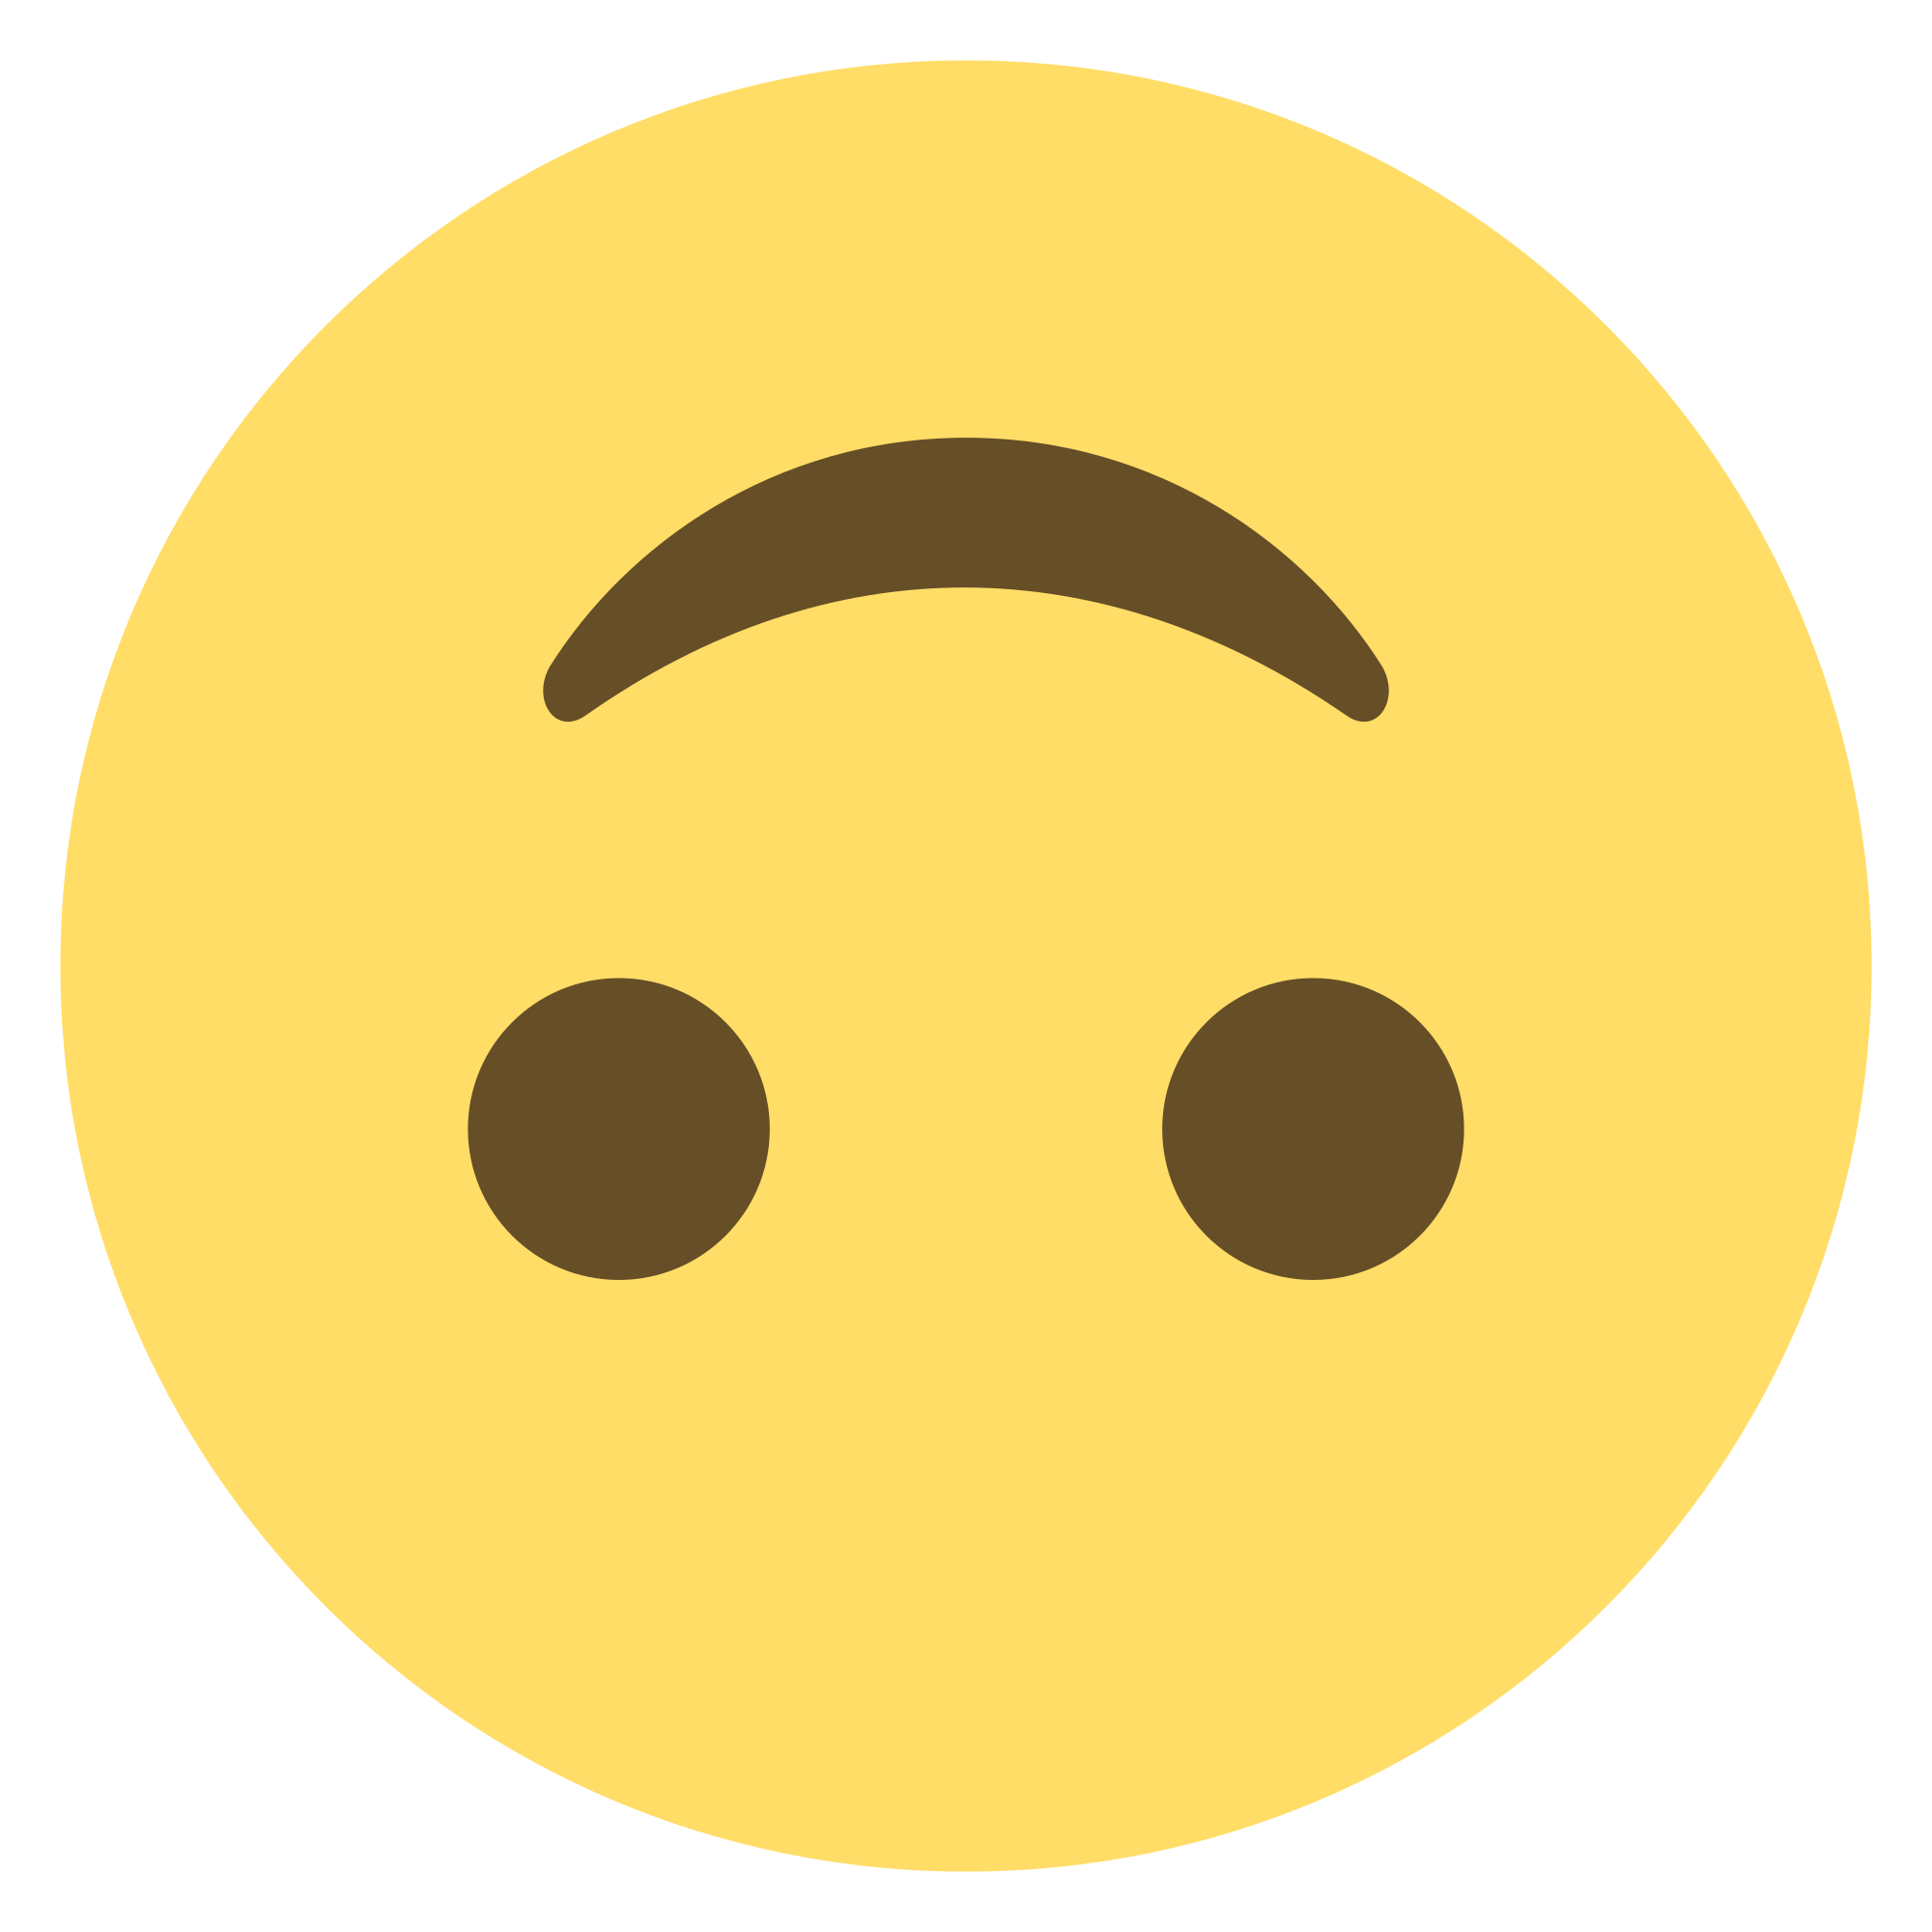
</div>

<h3><center>Have you ever received a text from a friend and could not tell if they were being sarcastic or not? It can be really embarrassing when you misinterpret sarcasm. Use this free tool to prevent avoidable humiliation!</center></h3>

#### Let's:

In [21]:
start()

Is that sarcasm?


Text(value='')